## Solving a basic optimization problem with using PyGAD.

**Task**:

A van in a shop must be filled to transport household appliances, its load must be optimized by maximizing the value of what is transported for a given volume. You are free to test for chosen free space (volume capacity) values between 1 and 5.

# **Steps to Use pygad**



To use the pygad module, here is a summary of the required steps:


1.   Preparing the fitness_func parameter.
2.   Preparing Other Parameters.
3.   Import pygad.
4.   Create an Instance of the pygad.GA Class.
5.   Run the Genetic Algorithm.
6.   Plotting Results.
7.   Information about the Best Solution.
8.   Saving & Loading the Results.

## Install PyGAD

In [ ]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.7 MB/s eta 0:00:00


## Import required libraries

In [ ]:
import pygad
import numpy as np
import pandas as pd

## Load data from "products.xlsx" using pandas

In [ ]:
file_path = 'your file_path'
products_df = pd.read_excel(file_path)

## Display the first few rows of the dataset to understand its structure


In [ ]:
products_df.head()

,Product,Space,Price,Quantity
0,Refrigerator A,0.751000,999.90,3
1,Cell phone,0.000009,2199.12,2
2,TV 55,0.400000,4346.99,5
3,TV 50,0.290000,3999.90,5
4,TV 42,0.200000,2999.00,5


## Check for missing data

In [ ]:
products_df.isna()

,Product,Space,Price,Quantity
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


## Сreate lists from DataFrame columns for further work with them.

In [ ]:
product = products_df["Product"].tolist()
space = products_df["Space"].tolist()
prices = products_df["Price"].tolist()
quantities = products_df["Quantity"].tolist()

## Volume we can use by condition.

In [ ]:
volume_capacity = 5

## Preparing the fitness_func.

In [ ]:
def fitness_func(ga_instance, solution, solution_idx):
    total_space = np.sum(solution * space)
    total_price = np.sum(solution * prices)

    # Fine for exceeding the volume
    if total_space > volume_capacity:
        return 0
    return total_price

## Preparing Other Parameters

In [ ]:
num_generations=500  # Number of generations.

num_parents_mating=10  # Number of solutions to be selected as parents.

sol_per_pop=50  #  Number of solutions (i.e. chromosomes) within the population.

num_genes=len(product)  # Number of genes in the solution/chromosome. (Сorresponds to the number of types of our products).

gene_space=[range(0, q+1) for q in quantities]  # It is used to specify the possible values for each gene. (Corresponds to the quantity of each product.)

parent_selection_type="rank"  # The parent selection type for rank selection.

crossover_type="single_point"  #  Type of the crossover operation for single-point crossover.

mutation_type="random"  # Type of the mutation operation for random mutation.

mutation_probability=0.05  #  The probability of selecting a gene for applying the mutation operation.

random_seed=14  # This helps to reproduce the same results by setting the same random seed.


In [ ]:
def on_gen(ga_instance):
    """
    Simple function that just prints the current generation number and
    the fitness value of the best solution in the current generation.
    """
    print("Generation : ", ga_instance.generations_completed)
    print("Fitness of the best solution :", ga_instance.best_solution()[1])

## Create an Instance of the pygad.GA Class

In [ ]:
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    parent_selection_type=parent_selection_type,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_probability=mutation_probability,
    random_seed=random_seed,
    on_generation=on_gen
)

## Run the Genetic Algorithm

In [ ]:
ga_instance.run()

Generation :  1
Fitness of the best solution : 0
Generation :  2
Fitness of the best solution : 0
Generation :  3
Fitness of the best solution : 0
Generation :  4
Fitness of the best solution : 0
Generation :  5
Fitness of the best solution : 0
Generation :  6
Fitness of the best solution : 0
Generation :  7
Fitness of the best solution : 0
Generation :  8
Fitness of the best solution : 0
Generation :  9
Fitness of the best solution : 0
Generation :  10
Fitness of the best solution : 0
Generation :  11
Fitness of the best solution : 0
Generation :  12
Fitness of the best solution : 0
Generation :  13
Fitness of the best solution : 0
Generation :  14
Fitness of the best solution : 0
Generation :  15
Fitness of the best solution : 0
Generation :  16
Fitness of the best solution : 0
Generation :  17
Fitness of the best solution : 0
Generation :  18
Fitness of the best solution : 0
Generation :  19
Fitness of the best solution : 0
Generation :  20
Fitness of the best solution : 0
Generatio

## Plotting Results

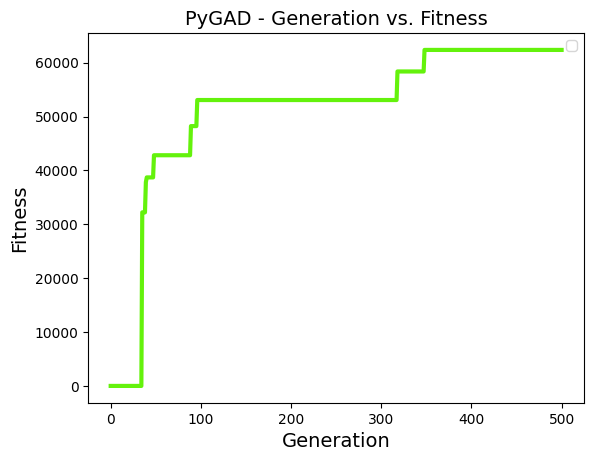

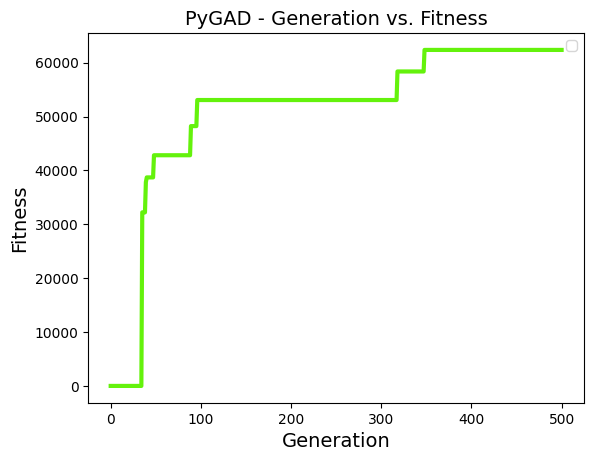

In [ ]:
ga_instance.plot_fitness()

## Information about the Best Solution

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()

product_solution = {name: int(qty) for name, qty in zip(product, solution) if qty > 0}
print(f"Parameters of the best solution : {product_solution}")

print(f"Fitness value of the best solution = {solution_fitness}")

total_volume = np.sum(solution * space)
print(f"Total volume: {total_volume}")

Parameters of the best solution : {'Refrigerator A': 1, 'Cell phone': 1, 'TV 55': 3, 'TV 50': 5, 'TV 42': 3, 'Notebook A': 4, 'Microwave B': 1, 'Microwave C': 9, 'Notebook C': 1}
Fitness value of the best solution = 62358.6
Total volume: 4.88350899


## Saving & Loading the Results

In [ ]:
filename = 'genetic'
ga_instance.save(filename=filename)

In [ ]:
loaded_ga_instance = pygad.load(filename=filename)

In [ ]:
print(loaded_ga_instance.best_solution())

(array([1., 1., 3., 5., 3., 4., 0., 0., 1., 9., 0., 0., 0., 1.]), 62358.6, 0)
